In [22]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, activations
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, DenseNet201, InceptionResNetV2, ResNet50, ResNet101, InceptionV3, DenseNet121, EfficientNetB1
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import cv2 as cv2
import sklearn.metrics as sklearn
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
!unzip gdrive/My\ Drive/Archive/archive.zip

Archive:  gdrive/My Drive/Archive/archive.zip
replace __MACOSX/._archive? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [25]:
train_path = '/content/archive/train'
test_path = '/content/archive/test'

In [26]:
class_names = ['Benign',"Malignant"]
class_labels = {}
for i, classes in enumerate(class_names, start=0):
  class_labels[classes] = i

print(class_labels)

{'Benign': 0, 'Malignant': 1}


In [27]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
  )
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_dataset = train_datagen.flow_from_directory(
train_path,
target_size=(150, 150),
batch_size=32,
class_mode='binary'
)

Found 11879 images belonging to 2 classes.


In [29]:
test_dataset = test_datagen.flow_from_directory(
test_path,
target_size=(150, 150),
batch_size=32,
class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [30]:
def create_Inception_Resnet_V2():
  base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))
  model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
  ])
  return model

In [31]:
def create_Resnet101():
  base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(150,150,3))
  model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
  ])
  return model

In [32]:
def create_InceptionV3():
  base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150,150,3))
  model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
  ])
  return model

In [33]:
models = [create_Inception_Resnet_V2(),
          create_Resnet101(), create_InceptionV3()
          ]

for model in models:
  model.compile(
        loss='binary_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy'])
  model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 3, 3, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_3  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 1)                 1537      
                                                                 
Total params: 54338273 (207.28 MB)
Trainable params: 54277729 (207.05 MB)
Non-trainable params: 60544 (236.50 KB)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape         

In [34]:
histories = []
accuracies = []
recalls = []
precisions = []
f1_scores = []

for model in models:
    history = model.fit(
        train_dataset,
        epochs=5,
        validation_data=test_dataset
    )
    histories.append(history)

    loss, accuracy = model.evaluate(test_dataset)
    accuracies.append(accuracy)

    y_pred = model.predict(test_dataset)
    y_pred_binary = np.round(y_pred)

    precision = sklearn.precision_score(test_dataset.labels, y_pred_binary)
    recall = sklearn.recall_score(test_dataset.labels, y_pred_binary)
    f1 = sklearn.f1_score(test_dataset.labels, y_pred_binary)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

for i, model in enumerate(models):
    print(f"Model {i+1}:")
    print(f"  Precision: {precisions[i]}")
    print(f"  Recall: {recalls[i]}")
    print(f"  F1 Score: {f1_scores[i]}")


Epoch 1/5
372/372 [==============================] - 222s 329ms/step - loss: 0.3325 - accuracy: 0.8640 - val_loss: 0.3424 - val_accuracy: 0.8410
Epoch 2/5
372/372 [==============================] - 116s 310ms/step - loss: 0.2856 - accuracy: 0.8828 - val_loss: 0.3550 - val_accuracy: 0.8855
Epoch 3/5
372/372 [==============================] - 115s 309ms/step - loss: 0.2693 - accuracy: 0.8874 - val_loss: 0.2937 - val_accuracy: 0.8720
Epoch 4/5
372/372 [==============================] - 115s 309ms/step - loss: 0.2543 - accuracy: 0.8928 - val_loss: 0.3189 - val_accuracy: 0.8335
Epoch 5/5
63/63 [==============================] - 8s 70ms/step
Epoch 1/5
372/372 [==============================] - 204s 355ms/step - loss: 0.4468 - accuracy: 0.8120 - val_loss: 2.7761 - val_accuracy: 0.5000
Epoch 2/5
372/372 [==============================] - 130s 349ms/step - loss: 0.4126 - accuracy: 0.8161 - val_loss: 0.6834 - val_accuracy: 0.5130
Epoch 3/5
372/372 [==============================] - 131s 351ms/st

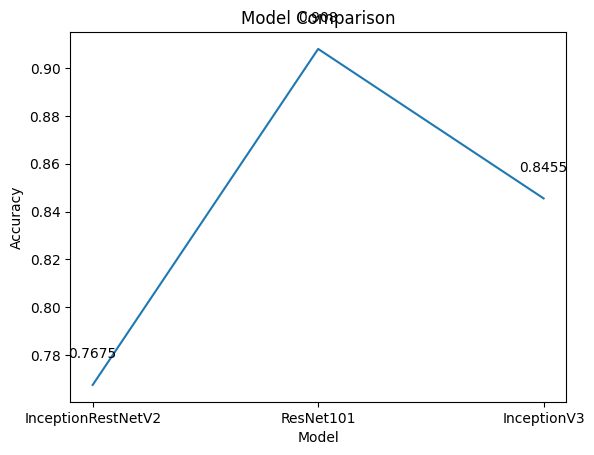

In [35]:
model_names = ['InceptionRestNetV2', 'ResNet101','InceptionV3']
plt.plot(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

for i, v in enumerate(accuracies):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()

TypeError: 'numpy.float64' object is not iterable

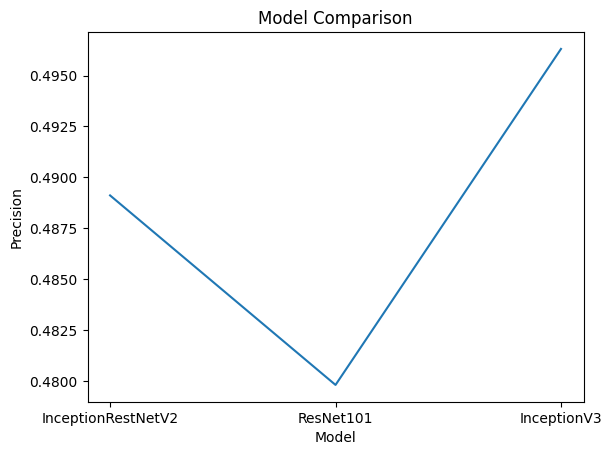

In [38]:
model_names = ['InceptionRestNetV2', 'ResNet101','InceptionV3']
plt.plot(model_names, precisions)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Comparison')

for i, v in enumerate(precision):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()

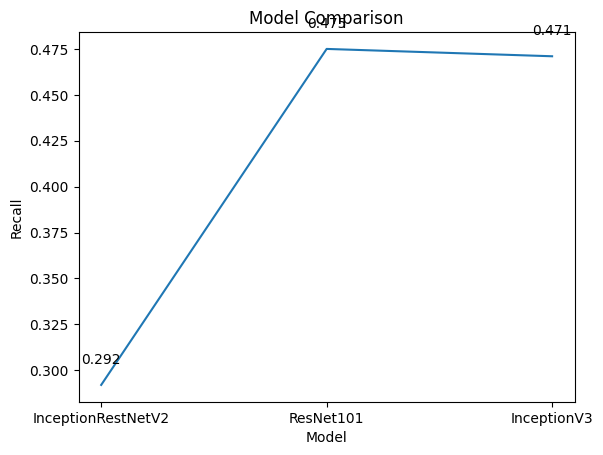

In [39]:
model_names = ['InceptionRestNetV2', 'ResNet101','InceptionV3']
plt.plot(model_names, recalls)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Comparison')

for i, v in enumerate(recalls):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()

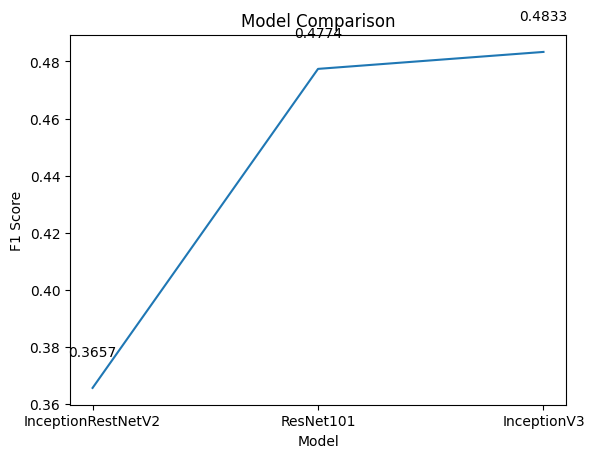

In [40]:
model_names = ['InceptionRestNetV2', 'ResNet101','InceptionV3']
plt.plot(model_names, f1_scores)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model Comparison')

for i, v in enumerate(f1_scores):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()